The training data consists of polarimetric radar parameters calculated from a disdrometer (an instrument that measures rain drop sizes, shapes, and rainfall rate) measurements from several years in Huntsville, Alabama. A model called `pytmatrix` is used to calculate polarimetric radar parameters from the droplet observations, which can be used as a way to compare what a remote sensing instrument would see and rainfall.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("homework/radar_parameters.csv")

print(data)

       Unnamed: 0   Zh (dBZ)  Zdr (dB)   Ldr (dB)  Kdp (deg km-1)  \
0               0  23.144878  0.418637 -41.757733        0.005395   
1               1  22.737156  0.322850 -43.772069        0.005194   
2               2  26.869826  0.330948 -43.577399        0.013385   
3               3  28.540561  0.399480 -42.139731        0.018872   
4               4  30.500127  0.543758 -39.763087        0.027438   
...           ...        ...       ...        ...             ...   
18964       18964  31.515997  0.579955 -39.244229        0.034048   
18965       18965  29.993334  0.567935 -39.399188        0.024134   
18966       18966  31.685913  0.655681 -38.375696        0.033971   
18967       18967  32.980096  0.768586 -37.166218        0.043117   
18968       18968  28.731399  0.804155 -36.795913        0.015908   

       Ah (dBZ/km)  Adr (dB/km)  R (mm/hr)  
0         0.000290     0.000012   2.393520  
1         0.000360     0.000012   3.502699  
2         0.000903     0.000030   8.

In [8]:
data["Z"] = 10**(data['Zh (dBZ)']/10)

print(data)

       Unnamed: 0   Zh (dBZ)  Zdr (dB)   Ldr (dB)  Kdp (deg km-1)  \
0               0  23.144878  0.418637 -41.757733        0.005395   
1               1  22.737156  0.322850 -43.772069        0.005194   
2               2  26.869826  0.330948 -43.577399        0.013385   
3               3  28.540561  0.399480 -42.139731        0.018872   
4               4  30.500127  0.543758 -39.763087        0.027438   
...           ...        ...       ...        ...             ...   
18964       18964  31.515997  0.579955 -39.244229        0.034048   
18965       18965  29.993334  0.567935 -39.399188        0.024134   
18966       18966  31.685913  0.655681 -38.375696        0.033971   
18967       18967  32.980096  0.768586 -37.166218        0.043117   
18968       18968  28.731399  0.804155 -36.795913        0.015908   

       Ah (dBZ/km)  Adr (dB/km)  R (mm/hr)            Z  
0         0.000290     0.000012   2.393520   206.294563  
1         0.000360     0.000012   3.502699   187.808651

In [9]:
X = data.iloc[:, [2, 3, 4, 5, 6, 8]]
y = data.iloc[:, 7]

1. Split the data into a 70-30 split for training and testing data.

In [10]:
from sklearn.model_selection import train_test_split
# split the data with 70% in the training data
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.7)

2. Using the split created in (1), train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset.  Compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Fit the linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)

print(model.intercept_)
print(model.coef_)


# evaluate the model on the second set of data
# Make predictions on both training and test sets
y1_pred = model.predict(X1)  # predictions on training set
y2_pred = model.predict(X2)  # predictions on test set

# Calculate metrics for the linear regression model
train_r2 = r2_score(y1, y1_pred)
test_r2 = r2_score(y2, y2_pred)
train_rmse = np.sqrt(mean_squared_error(y1, y1_pred))
test_rmse = np.sqrt(mean_squared_error(y2, y2_pred))


-15.51977632180023
[ 2.34143684e+00 -3.63876741e-01 -1.12122164e+02  9.67537224e+03
 -1.56995723e+04  5.36418741e-04]


In [31]:
# Calculate baseline predictions the formula provided Z = 200R^1.6
#It is not clear to me if I needed to use just one set (either train or test) for calculating the baseline metrics. I think that for a fair comparison I should use both sets.

Z1 = X1['Z']  # Z values from training set
Z2 = X2['Z']  # Z values from test set

# Solve for R using the baseline equation: R = (Z/200)^(1/1.6)
y1_baseline = (Z1/200)**(1/1.6)
y2_baseline = (Z2/200)**(1/1.6)

In [32]:
# Calculate R2 and the root mean square errors for the baseline model

baseline_train_r2 = r2_score(y1, y1_baseline)
baseline_test_r2 = r2_score(y2, y2_baseline)
baseline_train_rmse = np.sqrt(mean_squared_error(y1, y1_baseline))
baseline_test_rmse = np.sqrt(mean_squared_error(y2, y2_baseline))

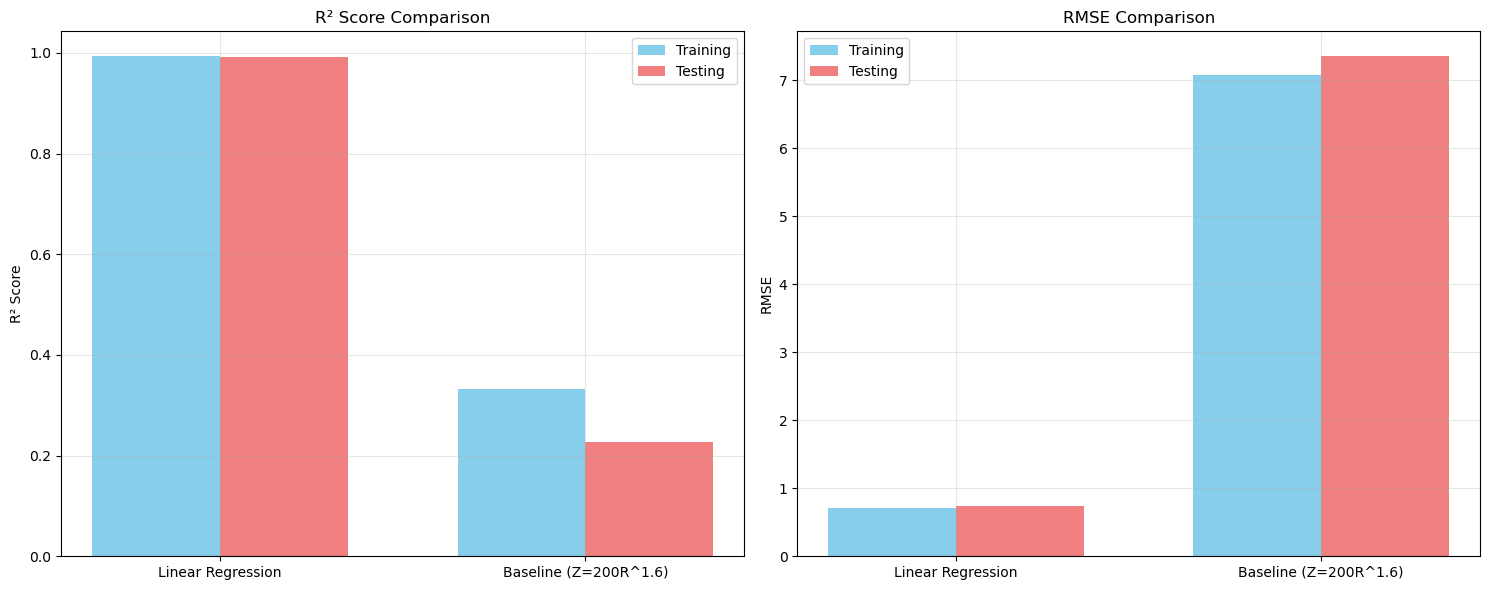

In [33]:

# Set up the figure with two , one for R2 and one for RMSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Data for plotting
models = ['Linear Regression', 'Baseline (Z=200R^1.6)']
train_r2_values = [train_r2, baseline_train_r2]
test_r2_values = [test_r2, baseline_test_r2]
train_rmse_values = [train_rmse, baseline_train_rmse]
test_rmse_values = [test_rmse, baseline_test_rmse]

# Bar width
width = 0.35
x = np.arange(len(models))

# Plot R² scores
ax1.bar(x - width/2, train_r2_values, width, label='Training', color='skyblue')
ax1.bar(x + width/2, test_r2_values, width, label='Testing', color='lightcoral')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot RMSE values
ax2.bar(x - width/2, train_rmse_values, width, label='Training', color='skyblue')
ax2.bar(x + width/2, test_rmse_values, width, label='Testing', color='lightcoral')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()


3. Repeat 1 doing a grid search over polynomial orders, using a grid search over orders 0-9, and use cross-validation of 7 folds.  For the best polynomial model in terms of $R^2$, does it outperform the baseline and the linear regression model in terms of $R^2$ and root mean square error?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#I used the pipeline method from sklearn to create a polynomial regression model, as in the class notebooks.

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [12]:
from sklearn.model_selection import GridSearchCV


param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7, scoring='neg_mean_squared_error')

In [13]:
train_grid = grid.fit(X1, y1)


In [ ]:
#Get results for each model

cv_results = pd.DataFrame(train_grid.cv_results_)

# Extract degree, mean test R², and RMSE
degrees = cv_results['param_polynomialfeatures__degree']
mean_test_r2 = cv_results['mean_test_score']
mean_test_rmse = np.sqrt(-cv_results['mean_test_score'])

In [15]:
print(cv_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003855      0.000668         0.001611        0.000212   
1        0.004415      0.000800         0.001527        0.000291   
2        0.010313      0.001479         0.002288        0.000459   
3        0.027270      0.002761         0.003022        0.000326   
4        0.090666      0.004762         0.005348        0.000668   
5        0.262280      0.017635         0.007994        0.001415   
6        0.594248      0.030414         0.016893        0.003359   
7        2.438482      0.203411         0.028674        0.002653   
8       10.032770      1.157620         0.049756        0.004963   
9       32.962845      0.842810         0.065663        0.004586   
10       0.003673      0.000351         0.001711        0.000245   
11       0.004503      0.000675         0.001707        0.000213   
12       0.008825      0.000439         0.002041        0.000194   
13       0.024298      0.002424         0.003507

In [ ]:
# Get the best model's R² and RMSE on the test set to compare to the baseline.
from sklearn.metrics import r2_score, mean_squared_error

y2_pred = train_grid.best_estimator_.predict(X2)
test_r2 = r2_score(y2, y2_pred)
test_rmse = np.sqrt(mean_squared_error(y2, y2_pred))
print(f"\nBest degree: {train_grid.best_params_['polynomialfeatures__degree']}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Best degree: 1
Test R²: 0.9923
Test RMSE: 0.7349


The best polynomial model is the first degree one and this is the same a simple linear regresion. This model performs better than the baseline calculation. 

4. Repeat 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
   
   ```python
   param_grid = {
    "bootstrap": [True, False],
    "max_depth": [10, 100],
    "max_features": ["sqrt", 1.0],  
    "min_samples_leaf": [1, 4],
    "min_samples_split": [2, 10],
    "n_estimators": [200, 1000]}
   ```
  Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of $R^2$ and root mean square error?



In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=0)

param_grid = {
    "bootstrap": [True, False],
    "max_depth": [10, 100],
    "max_features": ["sqrt", 1.0],
    "min_samples_leaf": [1, 4],
    "min_samples_split": [2, 10],
    "n_estimators": [200, 1000],
}

gs = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring={"r2": "r2", "rmse": "neg_root_mean_squared_error"},
    refit="rmse",            # refit best by RMSE
    cv=7,
    n_jobs=-1,
    verbose=1
)

# Fit the model
gs.fit(X1, y1)

# Get the best model and make predictions
best_model = gs.best_estimator_


Fitting 7 folds for each of 64 candidates, totalling 448 fits


In [ ]:
# Calculate metrics for both training and test sets
y_train_pred_rf = best_model.predict(X1)
y_test_pred_rf = best_model.predict(X2)

# Training metrics
train_rmse_rf = mean_squared_error(y1, y_train_pred_rf, squared=False)
train_r2_rf = r2_score(y1, y_train_pred_rf)

# Test metrics
test_rmse_rf = mean_squared_error(y2, y_test_pred_rf, squared=False)
test_r2_rf = r2_score(y2, y_test_pred_rf)

# Print results
print("\nRandom Forest Model Performance:")
print("-" * 45)
print(f"Training R²: {train_r2_rf:.4f}")
print(f"Testing R²:  {test_r2_rf:.4f}")
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Testing RMSE:  {test_rmse_rf:.4f}")
print("\nBest Parameters:", gs.best_params_)


Random Forest Model Performance:
---------------------------------------------
Training R²: 0.9967
Testing R²:  0.9540
Training RMSE: 0.4964
Testing RMSE:  1.7929

Best Parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


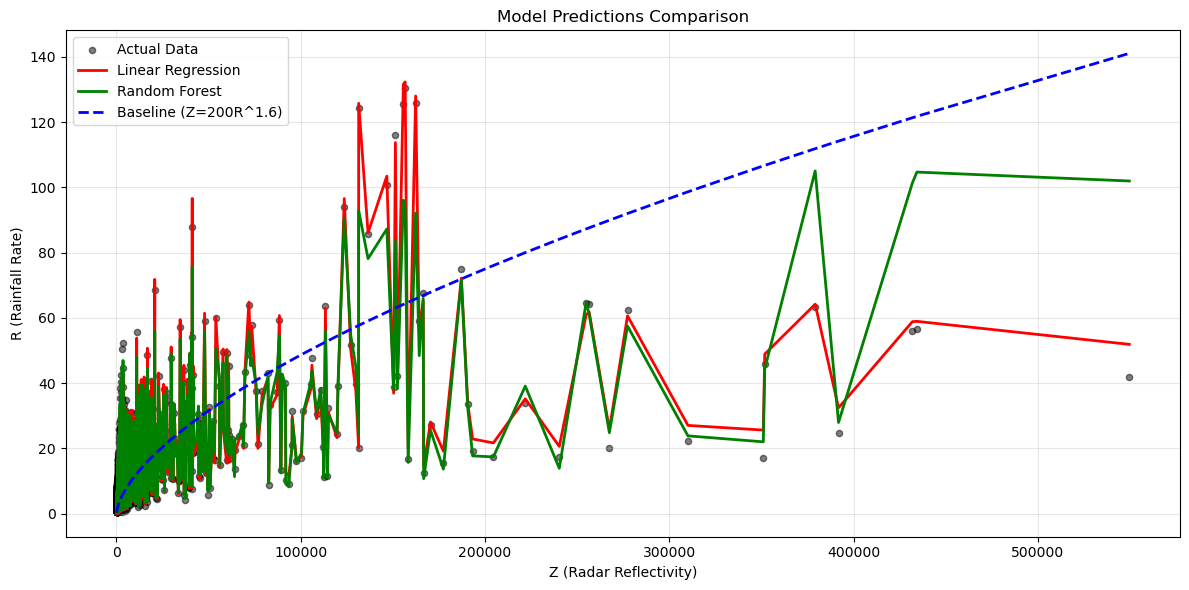

In [ ]:
# Creating a figure for comparing model predictions
plt.figure(figsize=(12, 6))

# Sort the data for proper line plotting
sort_idx = np.argsort(X2['Z'])
Z_sorted = X2['Z'].iloc[sort_idx]
y2_actual = y2.iloc[sort_idx]
y2_pred_lr = y2_pred[sort_idx]      # Linear Regression predictions
y_pred_rf_sorted = y_test_pred_rf[sort_idx]  # Random Forest predictions
y2_baseline_sorted = y2_baseline.iloc[sort_idx]  # Baseline predictions

# Plot the actual data points
plt.scatter(Z_sorted, y2_actual, c='black', alpha=0.5, label='Actual Data', s=20)

# Plot model predictions
plt.plot(Z_sorted, y2_pred_lr, 'r-', label='Linear Regression', linewidth=2)
plt.plot(Z_sorted, y_pred_rf_sorted, 'g-', label='Random Forest', linewidth=2)
plt.plot(Z_sorted, y2_baseline_sorted, 'b--', label='Baseline (Z=200R^1.6)', linewidth=2)

plt.xlabel('Z (Radar Reflectivity)')
plt.ylabel('R (Rainfall Rate)')
plt.title('Model Predictions Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Answer Q4: The best random forest model doesn't perform better than the linear regression. While the R2 is similar, the RMSE is higher. This represents the standard deviation of the residuals (prediction error), indicating how spread out these errors are around the regression line. We can see in the plot of the predictions comparison that the linear regression model performs better predicting the values.  